In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing

C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Import Dataset 

### Look first two rows in the dataset and decide how to import the whole dataset in pandas 

In [73]:
with open(r'D:\Springboard\Github\Lending Club Capstone Project\LoanStats_securev1_2020Q2.csv') as df:
    for i in range(3):
        print(df.readline())

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","fico_range_low","fico_range_high","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","last_fico_range_high","last_fico_range_low","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joi

## ?? how to read top several lines when the dataset is from github 

In [71]:
with open('https://raw.githubusercontent.com/rhodapang/Lending-Club-Capstone-Project/main/LoanStats_securev1_2020Q2.csv') as df:
    for i in range(3):
        print(df.readline())

OSError: [Errno 22] Invalid argument: 'https://raw.githubusercontent.com/rhodapang/Lending-Club-Capstone-Project/main/LoanStats_securev1_2020Q2.csv'

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rhodapang/Lending-Club-Capstone-Project/main/LoanStats_securev1_2020Q2.csv',
                 skiprows=1,sep=',')

C:\Users\rhoda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [76]:
df.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,169227883,NaN,25000.0,25000.0,25000.0,36 months,18.24%,906.83,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,169158642,NaN,15000.0,15000.0,15000.0,60 months,18.24%,382.87,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,169218684,NaN,5600.0,5600.0,5600.0,36 months,10.81%,182.84,A,A5,...,136.17549,5058.54,182.84,N,NaN,NaN,NaN,NaN,NaN,NaN
3,169165183,NaN,15000.0,15000.0,15000.0,36 months,9.56%,480.92,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,169131423,NaN,35000.0,35000.0,35000.0,60 months,14.02%,814.76,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df.shape

(13308, 150)

In [78]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [79]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status        float64
settlement_date          float64
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 150, dtype: object

### Because of there are 150 columns and too many missing value in the dataset, so I decide to exclude some columns with 80% missing value first for better further analysis

In [80]:
df.isnull().sum()

id                           0
member_id                13308
loan_amnt                    2
funded_amnt                  2
funded_amnt_inv              2
                         ...  
settlement_status        13308
settlement_date          13308
settlement_amount        13308
settlement_percentage    13308
settlement_term          13308
Length: 150, dtype: int64

# Data cleaning 

### preliminarily handle missing value 

In [3]:
for col in df.columns:
    if df[col].isnull().sum() >= len(df[col])* 0.8:
        df.drop(columns = col, inplace = True)

### After exclude the columns with 80% percentage, there are 109 columns in the dataset 

In [4]:
df.shape

(13308, 109)

In [83]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,169227883,25000.0,25000.0,25000.0,36 months,18.24%,906.83,C,C2,Paralegal,...,100.0,80.0,0.0,0.0,46900.0,35041.0,25200.0,15000.0,N,N
1,169158642,15000.0,15000.0,15000.0,60 months,18.24%,382.87,C,C2,NaN,...,100.0,NaN,0.0,0.0,16681.0,12545.0,0.0,8681.0,N,N
2,169218684,5600.0,5600.0,5600.0,36 months,10.81%,182.84,A,A5,Respiratory Therapist,...,80.0,16.7,0.0,0.0,310874.0,23814.0,14400.0,19200.0,NaN,N
3,169165183,15000.0,15000.0,15000.0,36 months,9.56%,480.92,A,A3,NaN,...,100.0,0.0,0.0,0.0,220080.0,142477.0,39300.0,153780.0,N,N
4,169131423,35000.0,35000.0,35000.0,60 months,14.02%,814.76,B,B2,Police Officer,...,100.0,0.0,0.0,0.0,414770.0,24016.0,16000.0,34770.0,N,N


### drop id colums, because it does not provide any meaningful information when analyze the data 

In [5]:
df.drop(columns = 'id',inplace=True)

## Build a missing table for better understand the dataset 

In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 108 columns.
There are 108 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_revol_delinq,9908,74.5
mths_since_last_delinq,8129,61.1
emp_title,1487,11.2
mths_since_recent_inq,1183,8.9
il_util,1136,8.5
...,...,...
total_pymnt,2,0.0
out_prncp_inv,2,0.0
out_prncp,2,0.0
initial_list_status,2,0.0


In [7]:
missing_table.head(20)

,Missing Values,% of Total Values
mths_since_recent_revol_delinq,9908,74.5
mths_since_last_delinq,8129,61.1
emp_title,1487,11.2
mths_since_recent_inq,1183,8.9
il_util,1136,8.5
emp_length,1021,7.7
next_pymnt_d,824,6.2
hardship_flag,552,4.1
bc_util,130,1.0
bc_open_to_buy,124,0.9


## deal with the missing value in rows

In [8]:
# drop the rows that are all missing value, so there have been two rows dropped. 
df = df.dropna(how='all')
df.shape

(13306, 108)

## check deplicates rows in dataframe

In [9]:
# Select all duplicate rows based on all columns and there is no row that are totally the same  
df_duplicate = df[df.duplicated(keep = False)]
df_duplicate

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag


## subset numeric columns to have a deep analysis

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include = numerics) 
df_num.shape

(13306, 83)

In [52]:
df_num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il

In [64]:
df_num.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,13306.000000,13306.000000,13306.000000,13306.000000,1.330600e+04,13267.000000,13306.000000,13306.000000,13306.00000,13306.000000,...,13306.000000,13306.00000,13306.000000,13184.000000,13306.000000,13306.0,1.330600e+04,13306.000000,13306.000000,1.330600e+04
mean,16518.837367,16518.837367,16518.508568,489.182053,9.913831e+04,21.709965,0.191267,719.033519,723.03397,0.448670,...,0.039531,1.99985,96.016684,25.938767,0.080114,0.0,2.456420e+05,68205.400271,38180.448820,6.221281e+04
std,10537.257438,10537.257438,10536.895049,305.154108,1.252916e+05,20.741911,0.661397,37.324432,37.32596,0.737437,...,0.300470,1.82603,7.367083,31.316141,0.273136,0.0,2.189395e+05,65573.044109,32292.021967,5.824423e+04
min,1000.000000,1000.000000,1000.000000,30.640000,0.000000e+00,0.000000,0.000000,660.000000,664.00000,0.000000,...,0.000000,0.00000,14.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,256.490000,5.600000e+04,13.630000,0.000000,690.000000,694.00000,0.000000,...,0.000000,1.00000,94.700000,0.000000,0.000000,0.0,8.297975e+04,27830.250000,15500.000000,2.445425e+04
50%,15000.000000,15000.000000,15000.000000,410.250000,8.000000e+04,19.780000,0.000000,715.000000,719.00000,0.000000,...,0.000000,2.00000,100.000000,14.300000,0.000000,0.0,1.807960e+05,51016.000000,29200.000000,4.832650e+04
75%,24000.000000,24000.000000,24000.000000,652.980000,1.160000e+05,26.830000,0.000000,745.000000,749.00000,1.000000,...,0.000000,3.00000,100.000000,50.000000,0.000000,0.0,3.505215e+05,86304.000000,51200.000000,8.225900e+04
max,40000.000000,40000.000000,40000.000000,1501.670000,7.087080e+06,999.000000,12.000000,845.000000,850.00000,5.000000,...,12.000000,14.00000,100.000000,100.000000,2.000000,0.0,3.104716e+06,870111.000000,322200.000000,1.087053e+06


In [ ]:
# show 9 column in one plot before normalize columns
j = 0 
for i in range(df_num.shape[1]):
    fig, axes = plt.subplots(nrows=2, ncols=4)    
    sns.set(rc={'figure.figsize':(13,7)})
    ax =sns.boxplot(data=df_num.iloc[:,j:j+9]) 
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
    df_num.iloc[:,j:j+9].boxplot(ax=axes[0,0]) # add boxplot to 1st subplot
    df_num.boxplot(column='price', by='bedrooms', ax=axes[0,1]) # add boxplot to 2nd subplot

    plt.show()
    j += 9

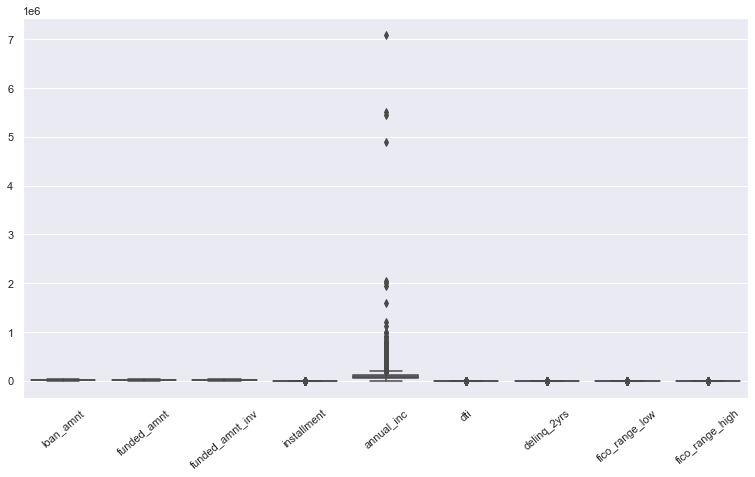

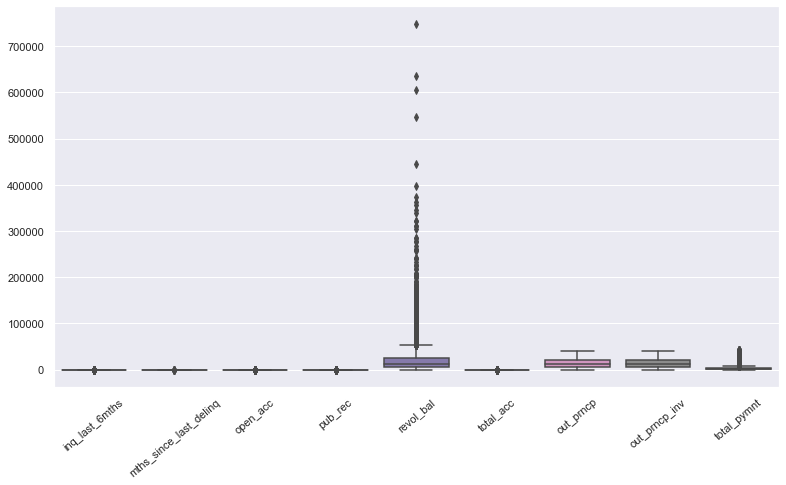

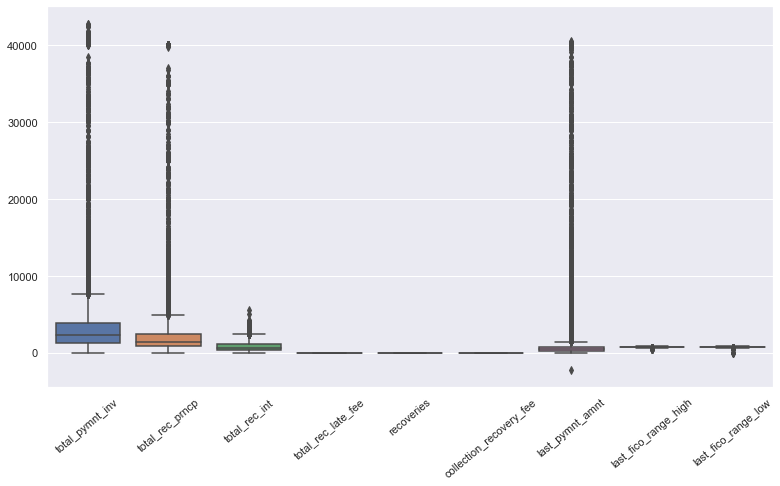

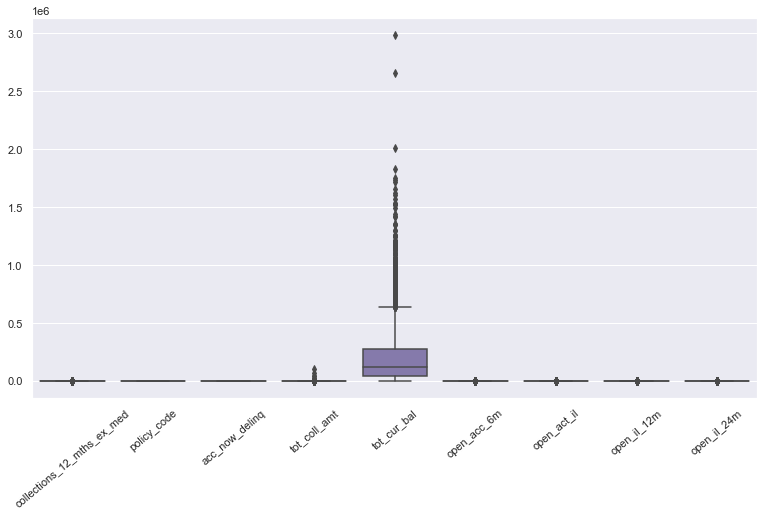

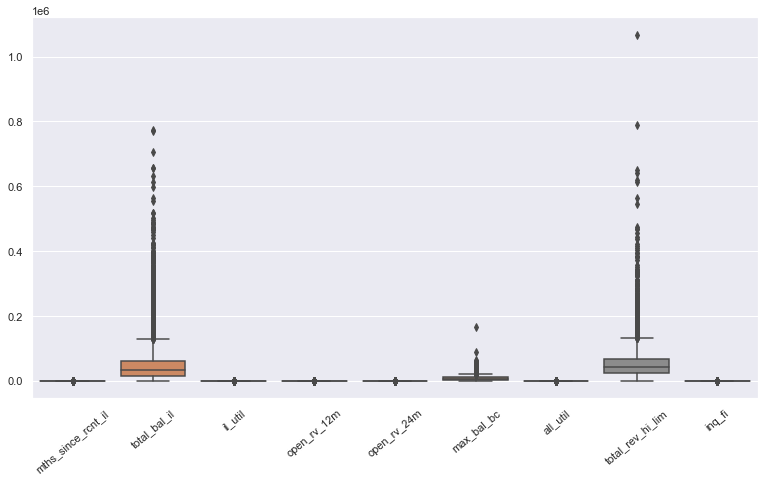

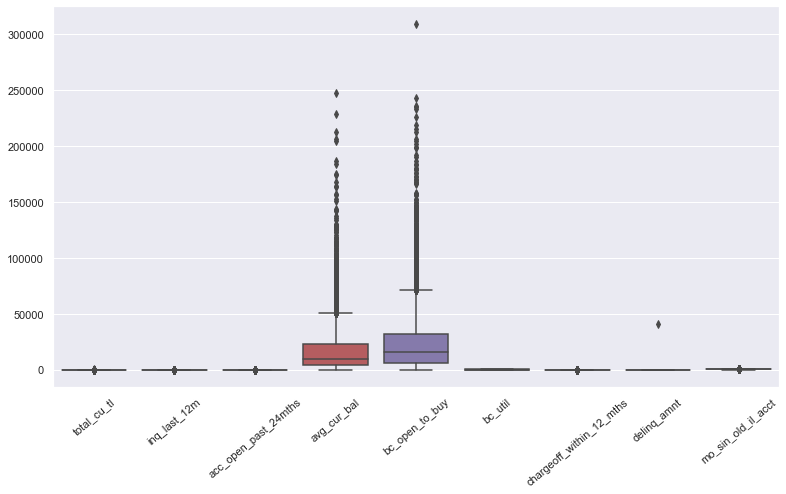

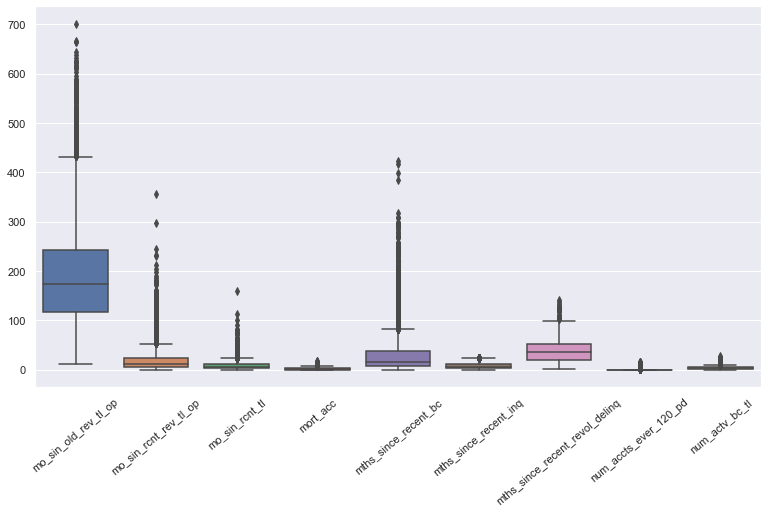

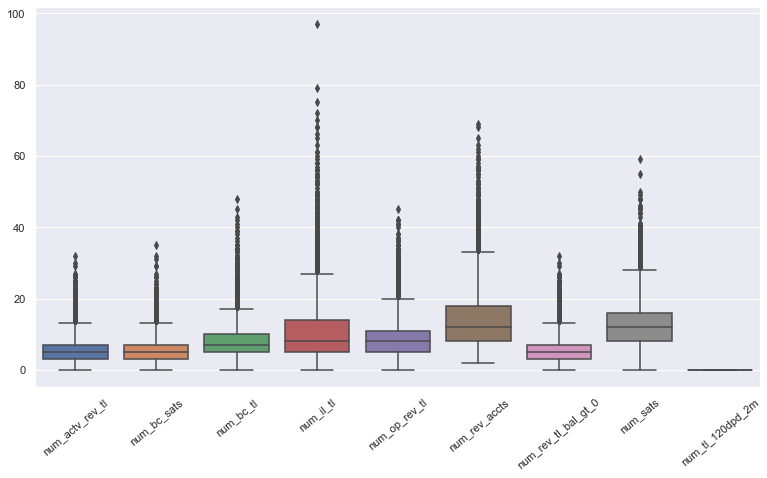

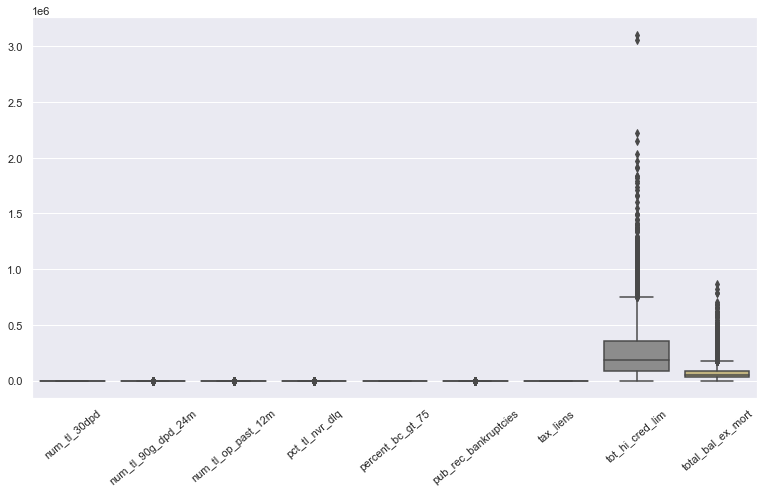

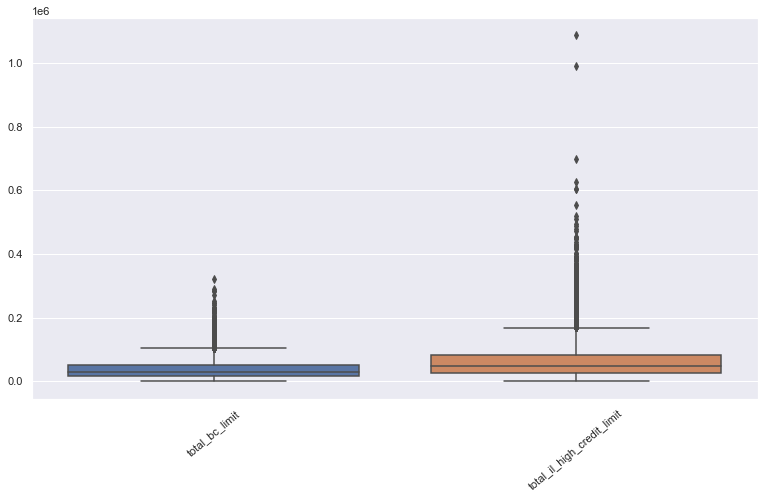

In [14]:
# show 9 column in one plot before normalize columns
j = 0 
for i in range(df_num.shape[1]):
    if j <= 81:
        sns.set(rc={'figure.figsize':(13,7)})
        ax =sns.boxplot(data=df_num.iloc[:,j:j+9]) 
        ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
        plt.show()
        j += 9

# normalize the dataframe and boxplot again

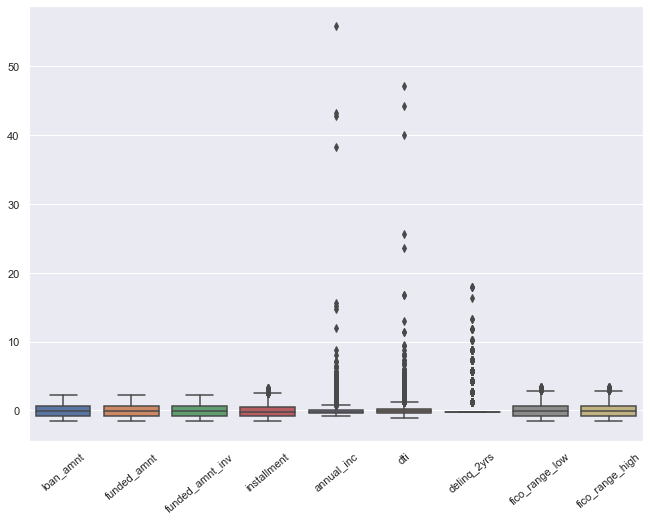

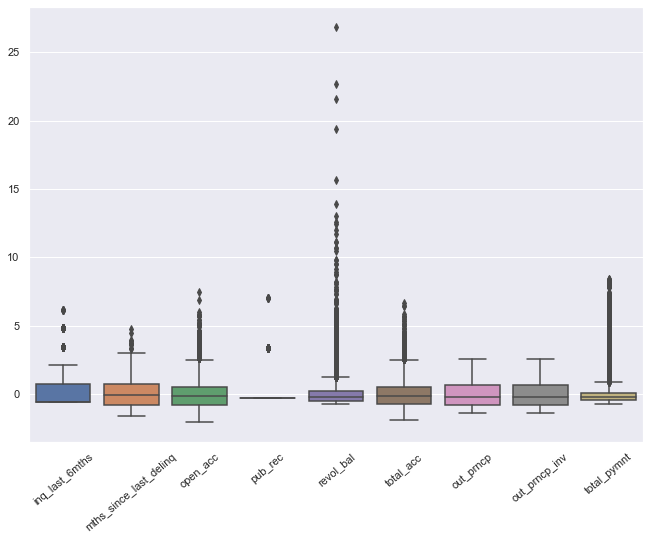

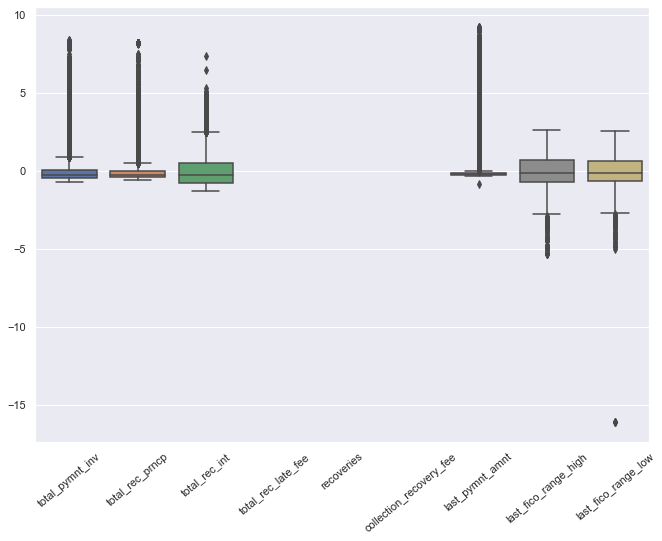

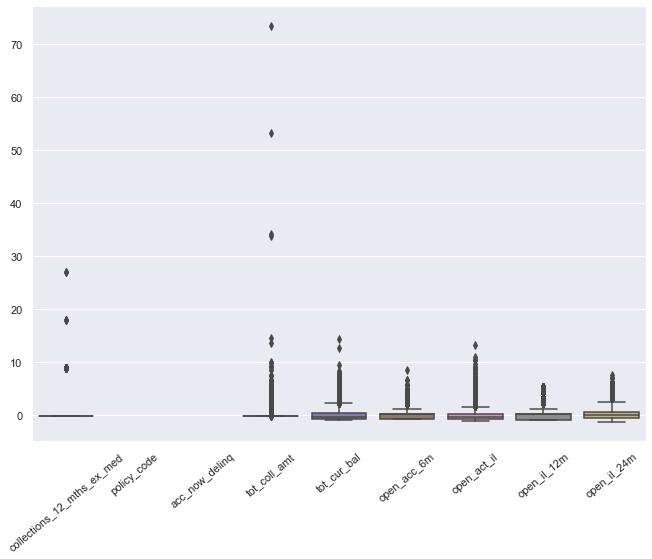

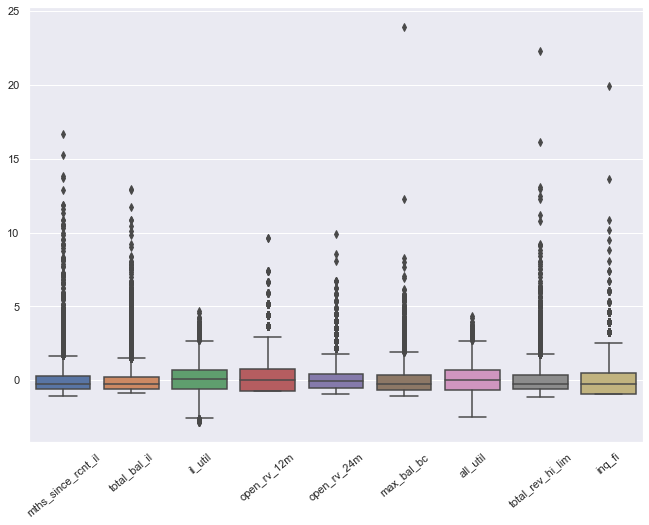

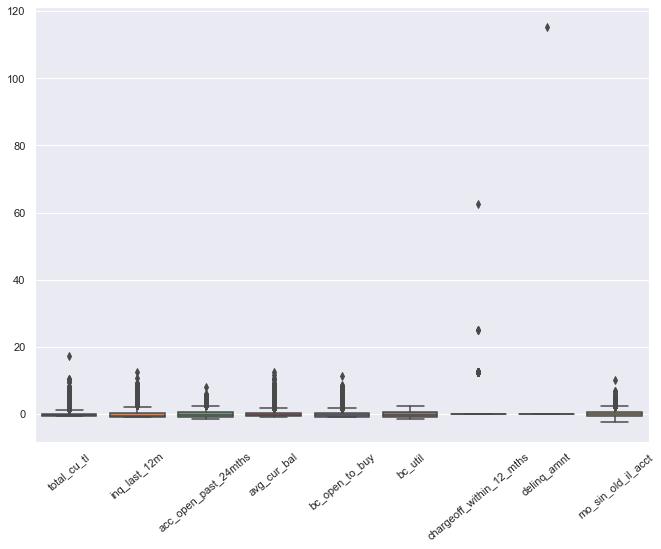

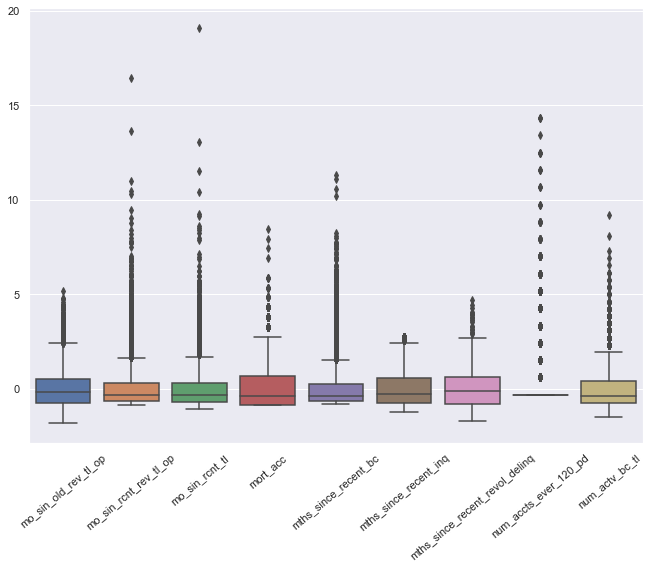

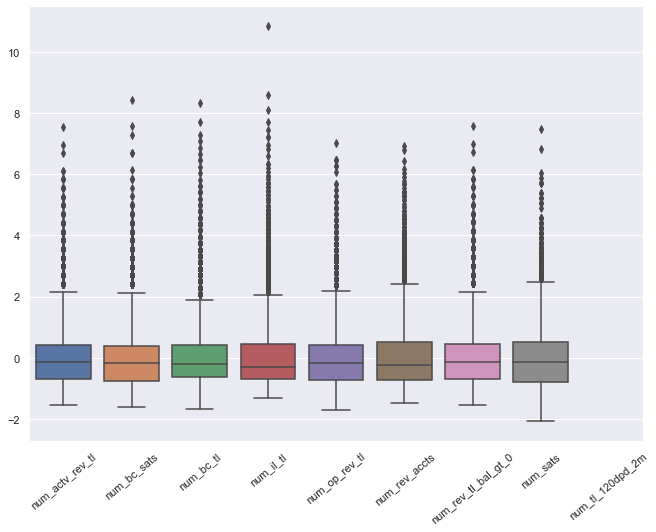

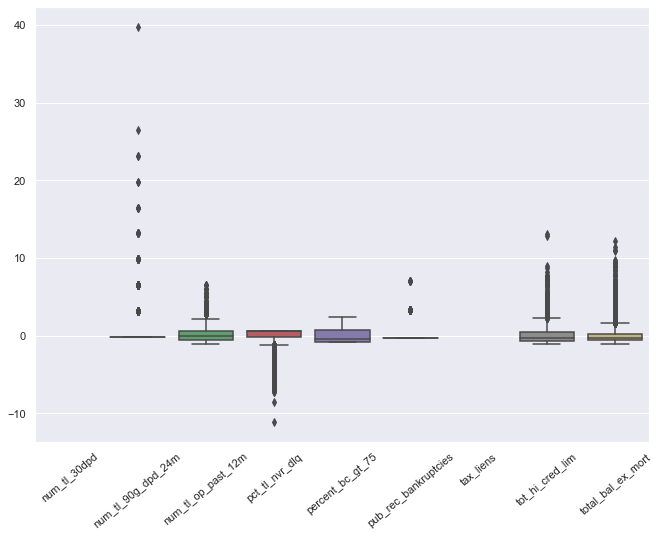

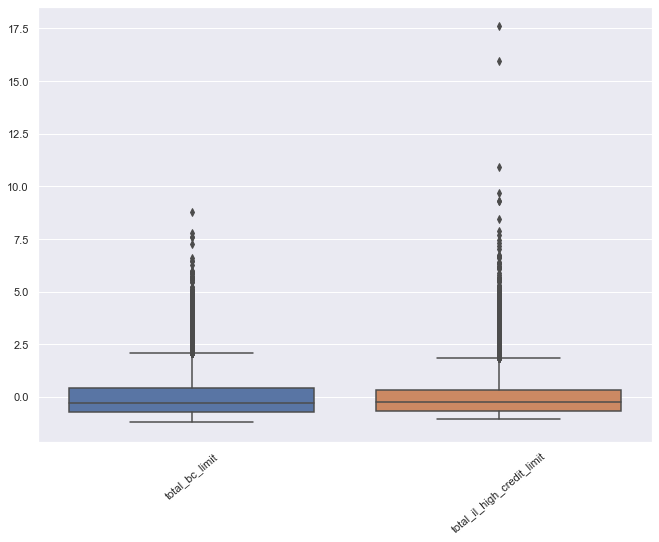

In [15]:
normalized_df_num=(df_num-df_num.mean())/df_num.std()

# show 9 column in one plotbo
j = 0 
for i in range(normalized_df_num.shape[1]):
    if j <= 81:
        sns.set(rc={'figure.figsize':(11,8)})
        ax= sns.boxplot(data=normalized_df_num.iloc[:,j:j+9]) 
        ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
        plt.show()
        j += 9